47


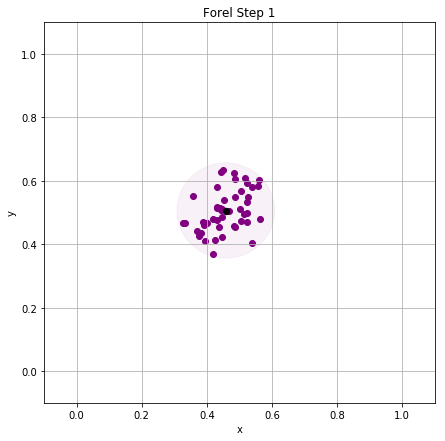

33


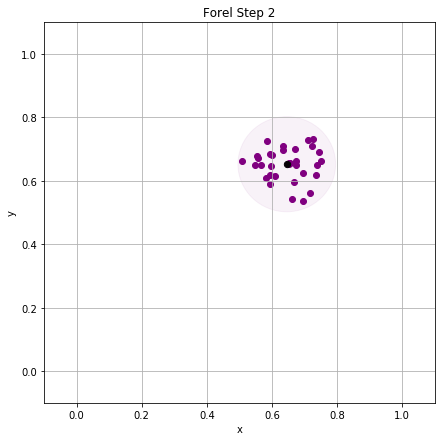

14


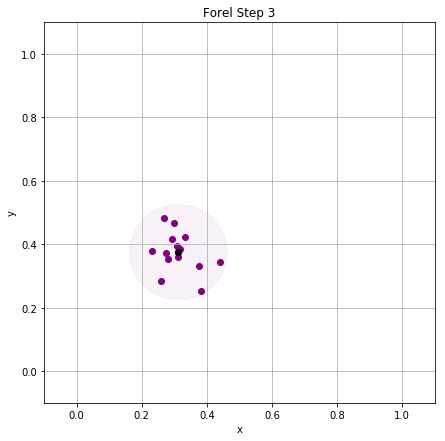

7


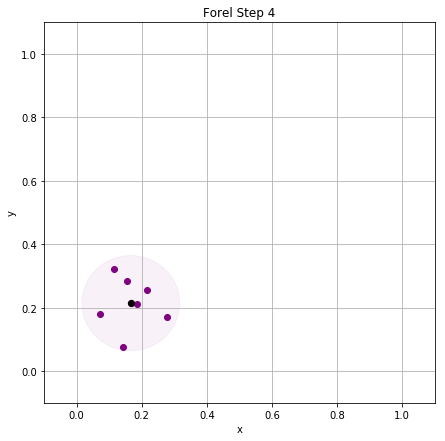

7


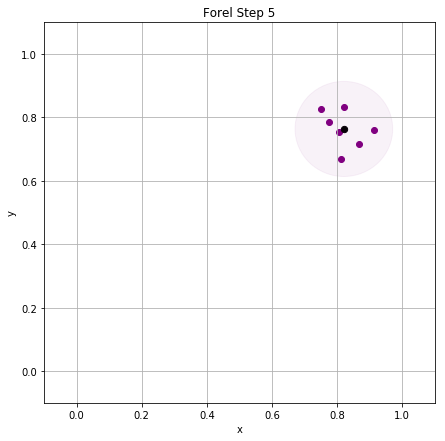

1


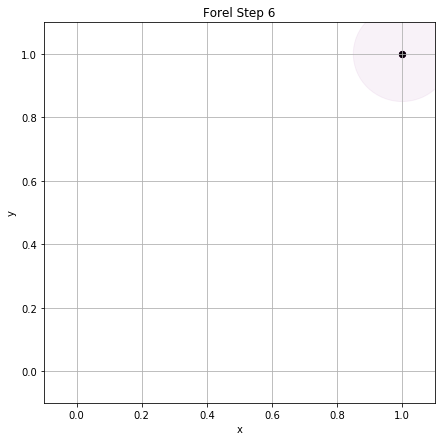

2


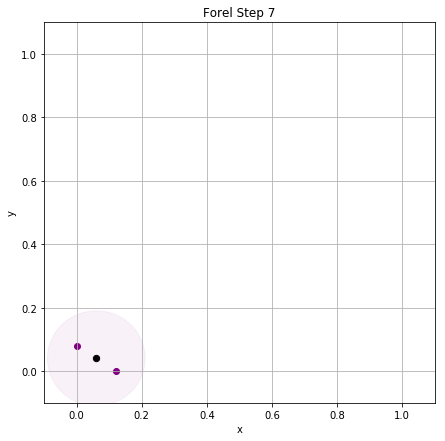

2


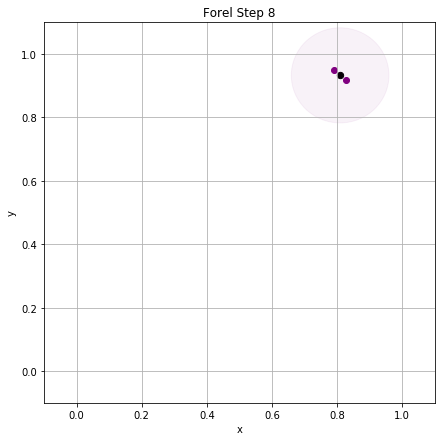

   X_center  Y_center  Number points in cluster
0  0.458265  0.506342                      47.0
1  0.645577  0.652389                      33.0
2  0.312664  0.374828                      14.0
3  0.166405  0.214286                       7.0
4  0.821036  0.763622                       7.0
5  1.000000  1.000000                       1.0
6  0.060440  0.040064                       2.0
7  0.809524  0.932692                       2.0
Quality clusterization =  1.4564834201776657


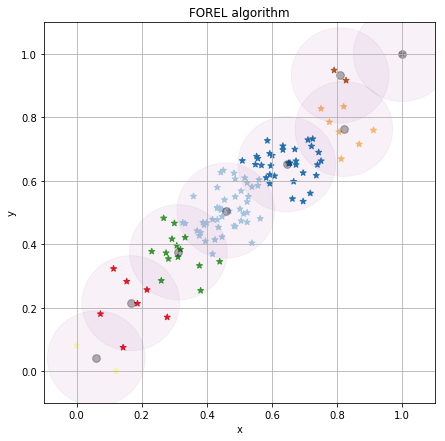

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances


def display_step(X, centroids, R):
    X = np.array(X)
    print(len(X))

    centroids = np.array(centroids)
    plt.figure(figsize=(7, 7))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])

    if len(X) > 0:
        plt.title(f'Forel Step {len(centroids)}')
        plt.scatter(X[:, 0], X[:, 1], marker="o", color='purple')

    plt.scatter(centroids[len(centroids)-1, 0], centroids[len(centroids)-1, 1],
                c='black', s=40)
    axes.add_patch(plt.Circle((centroids[len(centroids)-1, 0], centroids[len(centroids)-1, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def display(X, centroids, labels, R):
    X = np.array(X)
    centroids = np.array(centroids)

    plt.figure(figsize=(7, 7))
    axes = plt.gca()
    axes.set_xlim([-0.1, 1.1])
    axes.set_ylim([-0.1, 1.1])
    plt.title("FOREL algorithm")
    count_points = np.array(np.unique(labels, return_counts=True))
    point_in_classter = pd.DataFrame({"X_center": centroids[:, 0], "Y_center": centroids[:, 1],
                                        "Number points in cluster": count_points[1]})
    print(point_in_classter)
    # Оценка качества
    quality(labels, len(centroids), X, count_points[1])
    plt.scatter(X[:, 0], X[:, 1], c=labels,
                    s=40, cmap='Paired', marker="*")

    plt.scatter(centroids[:, 0], centroids[:, 1],
                c='black', s=60, alpha=0.3)
    for i in range(len(centroids)):  
        axes.add_patch(plt.Circle((centroids[i, 0], centroids[i, 1]), R,  color='purple', alpha = 0.05))
    ax.set_aspect('equal', adjustable='datalim')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


def count_labels(cur_data, clusters):
    labels = np.zeros(len(cur_data))
    j = 0
    for c in clusters:
        for k in range(len(cur_data)):
            for el in c:
                if cur_data[k][0] == el[0] and cur_data[k][1] == el[1]:
                    labels[k] = j
        j += 1

    return labels


def quality(labels, k, data, count_points):
    sum_ = 0
    for i in range(k):
        n,  = np.where(labels == i)
        c = np.c_[data[n][..., 0], data[n][..., 1]]
        dist = pairwise_distances(c, c)
        sum_ = sum_ + np.sum(dist) / count_points[i]

    FI = sum_ / k
    print("Quality clusterization = ", FI)


def cluster(points, radius, tol=1e-3):
    clusters = []
    centroids = []

    while len(points) != 0:
        # Выбираем слуйчаную точку для центроиды
        current_point = get_random_point(points)
        # Вычисляем попавших в радиус
        neighbors = get_neighbors(current_point, radius, points)
        # Вычисляем центроиду
        centroid = get_centroid(neighbors)
        while np.linalg.norm(current_point - centroid) > tol:
            current_point = centroid
            neighbors = get_neighbors(current_point, radius, points)
            centroid = get_centroid(neighbors)

        centroids.append(current_point)
        clusters.append(neighbors)
        display_step(neighbors, centroids, radius)
        points = remove_points(neighbors, points)

    return centroids, clusters


def get_neighbors(p, radius, points):
    neighbors = [point for point in points if np.linalg.norm(p - point) < radius]
    return np.array(neighbors)


def get_centroid(points):
    return np.array([np.mean(points[:, 0]), np.mean(points[:, 1])])


def get_random_point(points):
    random_index = np.random.choice(len(points), 1)[0]
    return points[random_index]

def remove_points(subset, points):
    k = 0
    index = []
    for i in range(len(points)):
        for j in range(len(subset)):
            if (points[i][0] == subset[j][0]) and points[i][1] == subset[j][1]:
                index.append(i)
    a = np.delete(points[..., 0], index)
    b = np.delete(points[..., 1], index)
    p = np.c_[a, b]
    return np.array(p)


if __name__ == '__main__':
    frame_vE = pd.DataFrame(np.loadtxt('sample_113.csv', delimiter=',', skiprows=1))
    frame_v = frame_vE[0]
    frame_E = frame_vE[1]
    norm_v = (frame_v - min(frame_v)) / (max(frame_v) - min(frame_v))
    norm_E = (frame_E - min(frame_E)) / (max(frame_E) - min(frame_E))
    data = np.c_[norm_v, norm_E]

    centroids, clusters = cluster(data, float(0.15))
    labels = count_labels(data, clusters)
    display(data, centroids, labels, float(0.15))

